### Imported Libraries + Dataset Extration and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
from scipy import stats
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif,  chi2

In [ ]:
data = pd.read_csv("/content/mushrooms.csv")

In [ ]:
# Display first 5 rows
print(data.head())

# ✅ Display number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)  # (rows, columns)

# ✅ Display column names
print("\nColumn names:")
print(data.columns.tolist())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### EDA

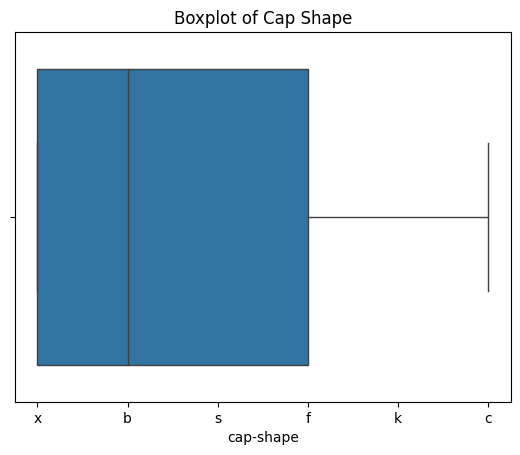

In [ ]:
sns.boxplot(x=data['cap-shape'])
plt.title("Boxplot of Cap Shape")
plt.show()

In [ ]:
z_scores = np.abs(zscore(data.select_dtypes(include=['int64', 'float64'])))
outliers = (z_scores > 3)

# Display outliers in any column
data_outliers = data[(outliers).any(axis=1)]
print(data_outliers.head())

Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


### Removing Outliers using Z-SCORE

In [ ]:
z_scores = np.abs(zscore(data.select_dtypes(include=['int64', 'float64'])))

threshold = 3

In [ ]:
# Keep only the rows where all z-scores are below the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

In [ ]:
print("Original dataset shape:", data.shape)
print("Dataset shape after outlier removal:", data_clean.shape)

Original dataset shape: (8124, 23)
Dataset shape after outlier removal: (8124, 23)


###  Train-Test Split and Model training

In [ ]:
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [ ]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 3: Train the SVM model
svm_model = SVC( probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

In [ ]:
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 0.9898
Test accuracy: 0.9926
Confusion Matrix:
 [[842   1]
 [ 11 771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Define model
svm_model = SVC(probability=True)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

# Show results
print("Cross-Validation Accuracies:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracies: [0.67773678 0.98646986 0.99753998 0.99261993 0.94704433 0.93226601
 1.         1.         0.64901478 0.98891626]
Average Accuracy: 0.9171607922975781


### Feature Selection-K BEST METHOD USING CHI SQUARE METHOD

In [ ]:
for k in range(4, X.shape[1] + 1):
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    X_selected = X[selected_features]

In [ ]:
# Train-test split (no scaling for chi2, since it requires non-negative)
X_train, X_test, y_train, y_test = train_test_split(
  X_selected, y, test_size=0.2, random_state=42
)

In [ ]:
# Train SVM
model = SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability for class 1

In [ ]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [ ]:
print(f"\n=== K={k} ===")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== K=22 ===
Training accuracy: 0.9898
Test accuracy: 0.9926
Confusion Matrix:
 [[842   1]
 [ 11 771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
accuracies = []

for k in range(1, 22):  # 1 to 21 features
    # Select top k features using Chi-Square
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    # Train model (Logistic Regression as example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))

# Display results
for k, acc in accuracies:
    print(f"Features: {k:2d} --> Accuracy: {acc:.4f}")

Features:  1 --> Accuracy: 0.7557
Features:  2 --> Accuracy: 0.7458
Features:  3 --> Accuracy: 0.7662
Features:  4 --> Accuracy: 0.8295
Features:  5 --> Accuracy: 0.8037
Features:  6 --> Accuracy: 0.8972
Features:  7 --> Accuracy: 0.8972
Features:  8 --> Accuracy: 0.9212
Features:  9 --> Accuracy: 0.9200
Features: 10 --> Accuracy: 0.9311
Features: 11 --> Accuracy: 0.9323
Features: 12 --> Accuracy: 0.9335
Features: 13 --> Accuracy: 0.9342
Features: 14 --> Accuracy: 0.9348
Features: 15 --> Accuracy: 0.9422
Features: 16 --> Accuracy: 0.9422
Features: 17 --> Accuracy: 0.9385
Features: 18 --> Accuracy: 0.9385
Features: 19 --> Accuracy: 0.9378
Features: 20 --> Accuracy: 0.9495
Features: 21 --> Accuracy: 0.9477


In [ ]:
# 10-fold CV
cv_scores = cross_val_score(model, X_new, y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracies:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracies: [0.66912669 0.85854859 0.98154982 0.98523985 0.89408867 0.86083744
 0.99876847 0.99753695 0.62315271 0.93472906]
Average Accuracy: 0.8803578245142057


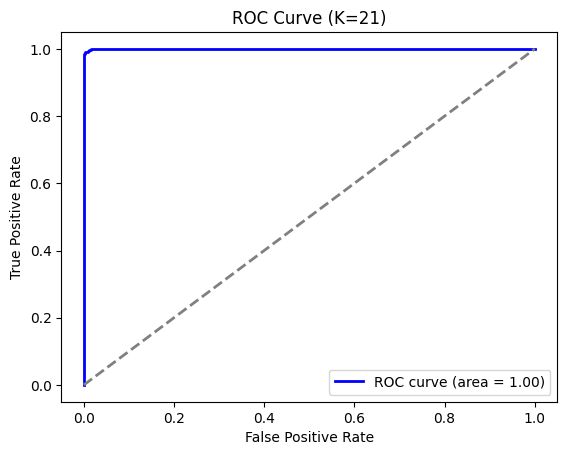

In [ ]:
 # ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (K={k})")
plt.legend(loc="lower right")
plt.show()